In [1754]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

## 1. Tiền xử lý dữ liệu 

### 1.1 Tổng quan về dữ liệu và loại bỏ dữ liệu thiếu

In [1755]:

df = pd.read_csv('processed_cleveland.csv')

In [1756]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [1757]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


#### Ý nghĩa các trường:

##### sex: 0: 'Nữ', 1: 'Nam'
##### cp: loại đau ngực (1: 'Đau thắt ngực điển hình', 2: 'Đau thắt ngực không điển hình', 3: 'Đau không do tim', 4: 'Không có triệu chứng')
##### trestbps: huyết áp khi nghỉ (mm Hg khi nhập viện)
##### chol: lượng cholesterol trong huyết thanh (mg/dl)
##### fbs: đường huyết lúc đói > 120 mg/dl (1 = đúng; 0 = sai)
##### restecg: kết quả điện tâm đồ khi nghỉ (0: 'bình thường', 1 và 2: 'bất thường')
##### thalach: nhịp tim tối đa đạt được
##### exang: đau thắt ngực khi gắng sức (1 = có; 0 = không)
##### oldpeak: độ chênh ST do gắng sức so với khi nghỉ
##### slope: độ dốc của đoạn ST khi gắng sức cực đại (1: 'dốc lên', 2: 'phẳng', 3: 'dốc xuống')
###### Dạng ST - Tình trạng tim
###### Dốc lên - Bình thường
###### Phẳng - Thiếu máu nhẹ
###### Dốc xuống - Thiếu máu nặng
##### ca: số mạch máu lớn (0–3) được nhuộm hiển thị bằng huỳnh quang
##### thal: bệnh tan máu bẩm sinh (thalassemia) (3: 'bình thường', 6: 'tổn thương cố định', 7: 'tổn thương có thể hồi phục')
##### num: tình trạng bệnh mạch vành (0: không bệnh tim, >0: có bệnh tim)

#### - Các trường liên tục - rời rạc
##### + Liên tục: age, trestbps, chol, thalach, oldpeak
##### + Rời rạc: sex, cp, fbs, restecg, exang, slope, ca, thal, num

In [1758]:
# In ra các giá trị unique của mỗi cột
for column in df.columns:
    unique_value = df[column].unique()
    print(column + ": ", end="")
    print(', '.join(map(str, unique_value)))

age: 63.0, 67.0, 37.0, 41.0, 56.0, 62.0, 57.0, 53.0, 44.0, 52.0, 48.0, 54.0, 49.0, 64.0, 58.0, 60.0, 50.0, 66.0, 43.0, 40.0, 69.0, 59.0, 42.0, 55.0, 61.0, 65.0, 71.0, 51.0, 46.0, 45.0, 39.0, 68.0, 47.0, 34.0, 35.0, 29.0, 70.0, 77.0, 38.0, 74.0, 76.0
sex: 1.0, 0.0
cp: 1.0, 4.0, 3.0, 2.0
trestbps: 145.0, 160.0, 120.0, 130.0, 140.0, 172.0, 150.0, 110.0, 132.0, 117.0, 135.0, 112.0, 105.0, 124.0, 125.0, 142.0, 128.0, 170.0, 155.0, 104.0, 180.0, 138.0, 108.0, 134.0, 122.0, 115.0, 118.0, 100.0, 200.0, 94.0, 165.0, 102.0, 152.0, 101.0, 126.0, 174.0, 148.0, 178.0, 158.0, 192.0, 129.0, 144.0, 123.0, 136.0, 146.0, 106.0, 156.0, 154.0, 114.0, 164.0
chol: 233.0, 286.0, 229.0, 250.0, 204.0, 236.0, 268.0, 354.0, 254.0, 203.0, 192.0, 294.0, 256.0, 263.0, 199.0, 168.0, 239.0, 275.0, 266.0, 211.0, 283.0, 284.0, 224.0, 206.0, 219.0, 340.0, 226.0, 247.0, 167.0, 230.0, 335.0, 234.0, 177.0, 276.0, 353.0, 243.0, 225.0, 302.0, 212.0, 330.0, 175.0, 417.0, 197.0, 198.0, 290.0, 253.0, 172.0, 273.0, 213.0, 305.0,

In [1759]:
# vì kí tự '?' vẫn được tính là giá trị nên info không phát hiện ra. Ta phải chuyển về NaN
df = df.replace('?', np.nan)

In [1760]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    object 
 12  thal      301 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [1761]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  num       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


In [1762]:
# Kiểm tra trùng lặp
print(df.duplicated().sum())

0


In [1763]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [1764]:
df[['sex', 'ca', 'thal']] = df[['sex', 'ca', 'thal']].astype(float)
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

### 1.2 Chuẩn hóa/Rời rạc hóa Biến

#### - Chuẩn hóa biến mục tiêu num sang target nhị phân:
#### Ý nghĩa: num $\in \{0, 1, 2, 3, 4\}$. Chuyển về target $\in \{0: \text{Không bệnh}, 1: \text{Có bệnh}\}$.

In [1765]:
df['num'] = (df['num'] > 0).astype(int)


In [1766]:
print(df['num'].value_counts())
print(137/(160+137))

num
0    160
1    137
Name: count, dtype: int64
0.4612794612794613


##### - Chuẩn hóa biến restecg (Kết quả điện tâm đồ):
##### Ý nghĩa: restecg $\in \{0: \text{bình thường}, 1, 2: \text{bất thường}\}$. Chuyển về nhị phân $\{0, 1\}$

In [1767]:
df['num'] = (df['num'] > 0).astype(int)
df.rename(columns={'num': 'target'}, inplace=True)
print(df['target'].value_counts())
print(137/(160+137))

target
0    160
1    137
Name: count, dtype: int64
0.4612794612794613


## 2. Khám Phá và Trực quan hóa Dữ liệu (EDA)

### 2.1. Biểu đồ 1: Phân bổ Biến Mục tiêu (target)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16376\2968656723.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='pastel')


Text(0, 0.5, 'Số lượng')

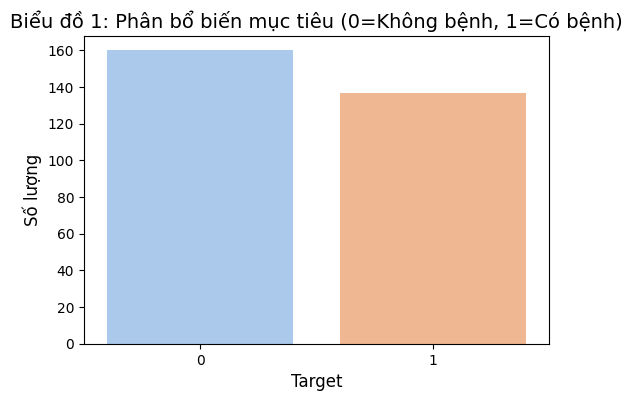

In [1768]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='pastel')
plt.title('Biểu đồ 1: Phân bổ biến mục tiêu (0=Không bệnh, 1=Có bệnh)', fontsize=14)
plt.xlabel('Target', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)


### 2.2. Biểu đồ 2: Loại Đau ngực (cp) và Bệnh tim (target)

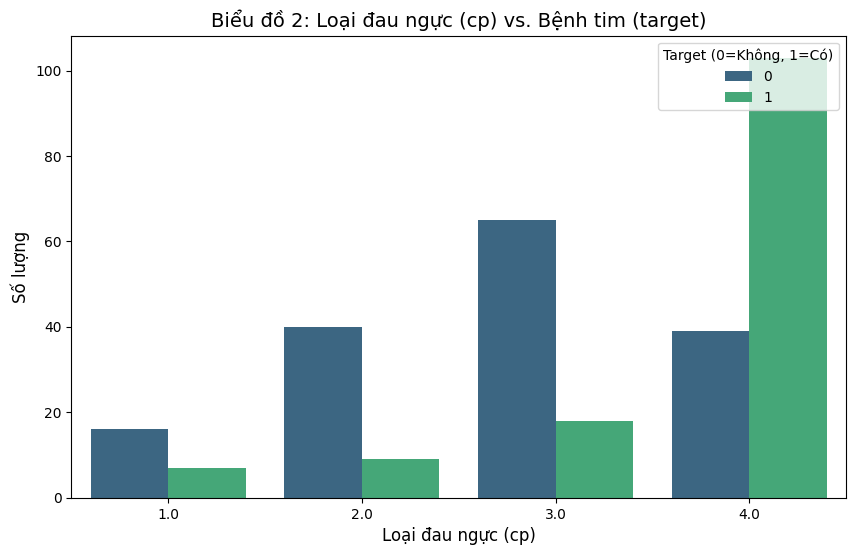

In [1769]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=df, palette='viridis')
plt.title('Biểu đồ 2: Loại đau ngực (cp) vs. Bệnh tim (target)', fontsize=14)
plt.xlabel('Loại đau ngực (cp)', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.legend(title='Target (0=Không, 1=Có)', loc='upper right')

#### Nhận xét:
1. Loại đau ngực 1.0, 2.0, và 3.0:

+ Trong cả ba nhóm này, cột màu xanh đậm (0 - Không bệnh) luôn cao hơn đáng kể so với cột màu xanh lá (1 - Có bệnh).

+ Ý nghĩa: Đa số những người có loại đau ngực 1, 2, hoặc 3 thực tế lại không được chẩn đoán mắc bệnh tim trong bộ dữ liệu này.

2. Loại đau ngực 4.0:

+ Cột màu xanh lá (1 - Có bệnh) cao vượt trội (khoảng 100 người) so với cột màu xanh đậm (0 - Không bệnh) (chỉ khoảng 40 người).

+ Ý nghĩa: Đa số những người thuộc nhóm "Loại đau ngực 4.0" có mắc bệnh tim.

### 2.3. Biểu đồ 3: Giới tính (sex) và Bệnh tim (target)

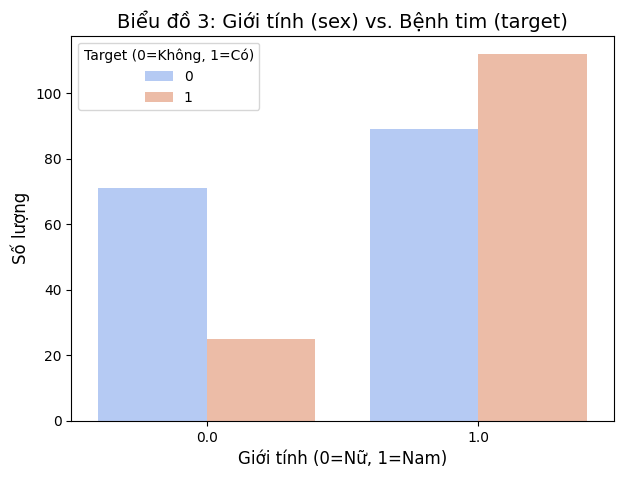

In [1770]:
df['sex'] = df['sex'].astype('category')
plt.figure(figsize=(7, 5))
sns.countplot(x='sex', hue='target', data=df, palette='coolwarm')
plt.title('Biểu đồ 3: Giới tính (sex) vs. Bệnh tim (target)', fontsize=14)
plt.xlabel('Giới tính (0=Nữ, 1=Nam)', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.legend(title='Target (0=Không, 1=Có)')

#### Nhận xét:
1. Đối với Nữ giới (Nhóm 0.0):
+ Cột xanh (Không bệnh) cao hơn rõ rệt (khoảng 71 người).
+ Cột cam (Có bệnh) thấp hơn đáng kể (khoảng 25 người).
=> Kết luận 1: Trong bộ dữ liệu này, đa số phụ nữ (khoảng 74%) không mắc bệnh tim.
2. Đối với Nam giới (Nhóm 1.0):
+ Cột cam (Có bệnh) cao hơn (khoảng 114 người).
+ Cột xanh (Không bệnh) thấp hơn (khoảng 89 người).
=> Kết luận 2: Trong bộ dữ liệu này, nam giới có tỷ lệ mắc bệnh cao hơn (khoảng 56%) so với không mắc bệnh.

### 2.4. Biểu đồ 4: Phân bổ Tuổi (age) theo Bệnh tim (target)

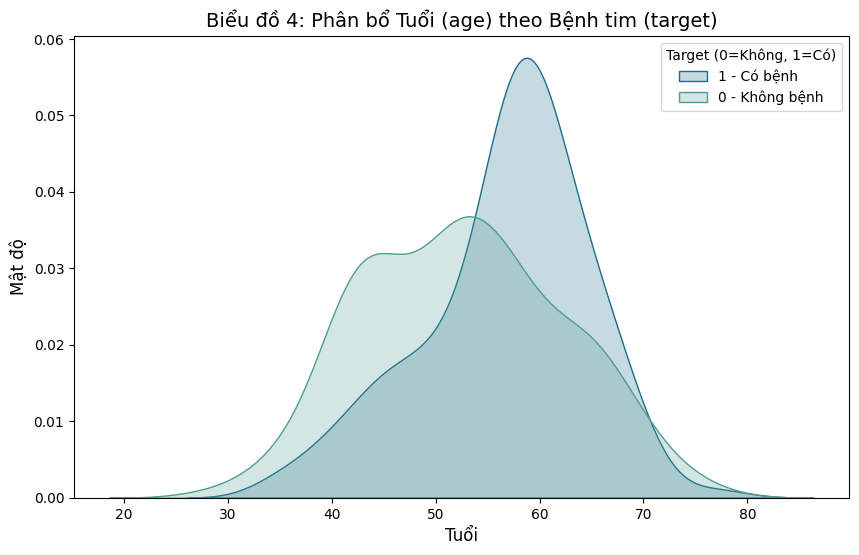

In [1771]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='age', hue='target', fill=True, common_norm=False, palette='crest')
plt.title('Biểu đồ 4: Phân bổ Tuổi (age) theo Bệnh tim (target)', fontsize=14)
plt.xlabel('Tuổi', fontsize=12)
plt.ylabel('Mật độ', fontsize=12)
plt.legend(title='Target (0=Không, 1=Có)', labels=['1 - Có bệnh', '0 - Không bệnh'])

#### Nhận xét:
1. Nhóm người Không bệnh có xu hướng trẻ hơn (tập trung nhiều ở 40-55 tuổi).
2. Nhóm người Có bệnh có xu hướng già hơn (tập trung nhiều ở khoảng 55-65 tuổi).
=>

### 2.5. Biểu đồ 5: Ma trận Tương quan (Correlation Matrix)

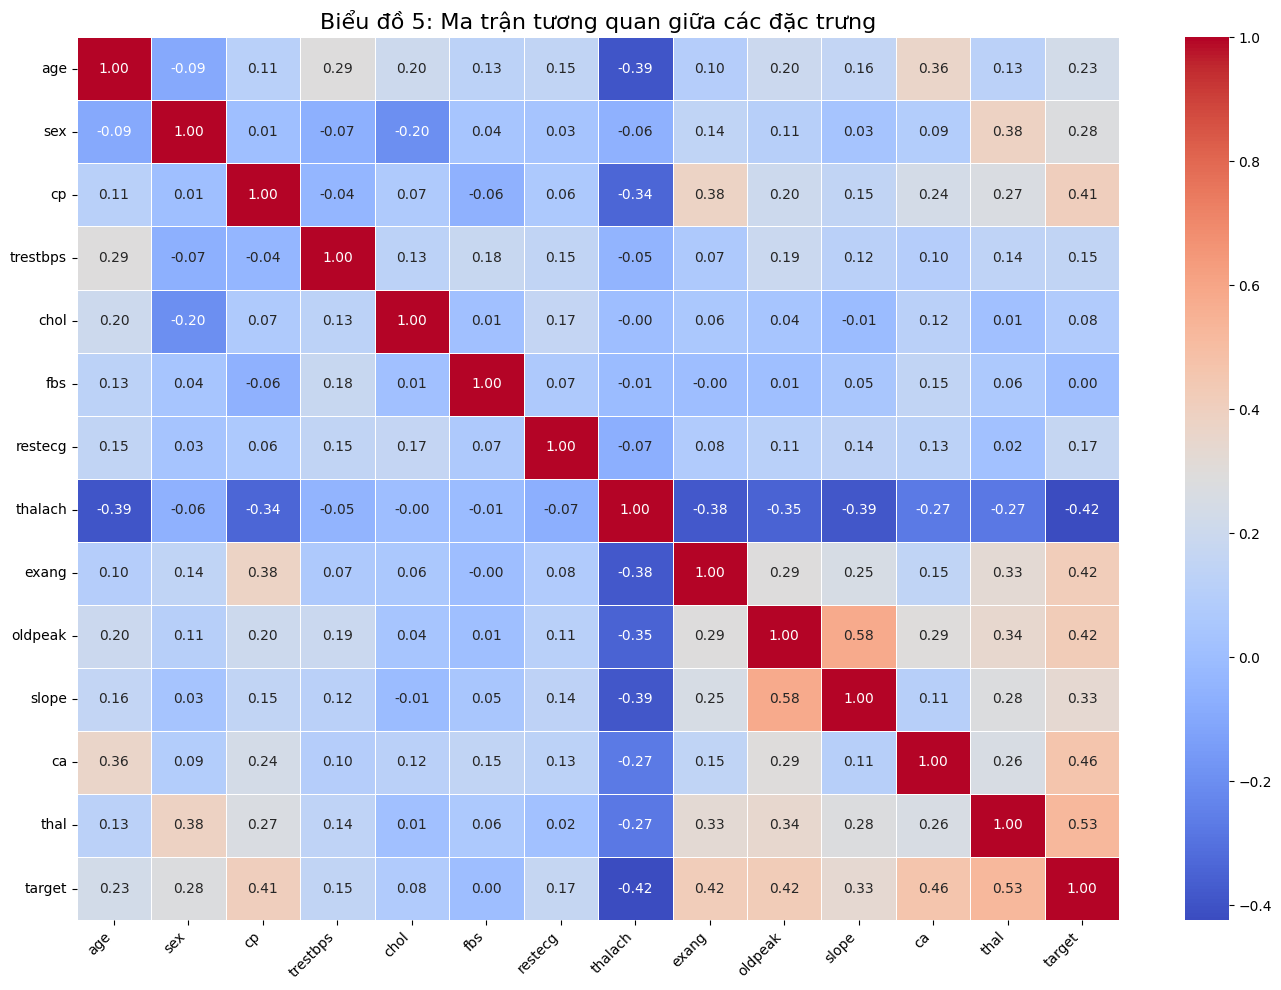

In [1772]:
numeric_cols = df
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_cols.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Biểu đồ 5: Ma trận tương quan giữa các đặc trưng', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout() # Giúp các nhãn không bị cắt

#### Nhận xét
1. Dóng target ta thấy những thuộc tính tương quan âm, dương nhiều: cp, thalach, exang, oldpeak, slope, ca, thal
2. Bỏ qua target, chỉ quan tâm tới những thuộc tính khác xem có bị đa cộng tuyến không: Ta thấy oldpeak và slope tương quan với nhau 0.58 ở mức trung bình => cả hai trường vẫn bổ sung thông tin cho nhau
3. Dóng target ta cũng thấy age và sex có độ tương quan lần lượt là 0.23 và 0.28 , ta thấy độ tương quan không quá cao, nhưng cũng không quá thấp so với những thuộc tính trên vì các thuộc tính trên giao động từ 0.33-53 . Thêm nữa, từ nhận xét của biểu đồ age-target, sex-target ta có thể chấp nhận việc giũ lại age và sex để bổ sung thêm thông tin
#### Tóm lại ta giữ lại 9 thuộc tính: age, sex, cp, thalach, exang, oldpeak, slope, ca, thal

In [1773]:
X = df.drop(columns=['trestbps', 'chol', 'fbs', 'restecg', 'target'])
y = df['target']
# # KNN: 0.85
# # DT - 3: 0.833
# # RF - none: 0.867
# # LR : 0.866

### 2.6. Biểu đồ hộp kiểm tra ngoại lai

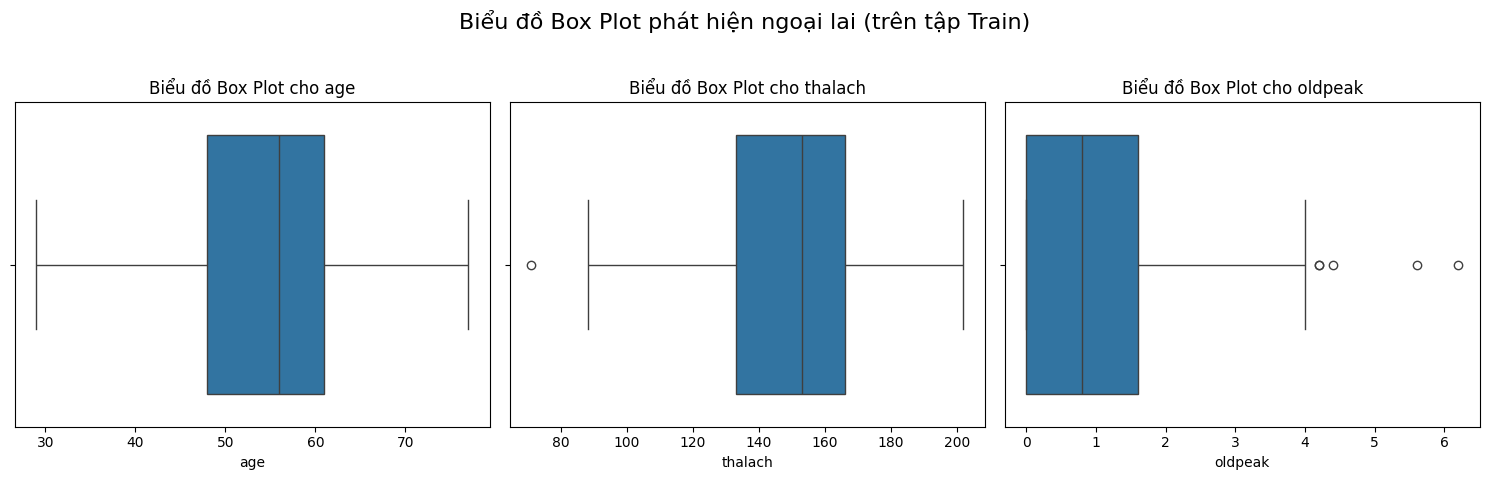

In [1774]:
# Các cột liên tục cần kiểm tra
continuous_features = ['age', 'thalach', 'oldpeak'] 

plt.figure(figsize=(15, 5))
plt.suptitle('Biểu đồ Box Plot phát hiện ngoại lai (trên tập Train)', fontsize=16)

for i, col in enumerate(continuous_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=X[col]) # Sử dụng X_train (DataFrame trước khi scale)
    plt.title(f'Biểu đồ Box Plot cho {col}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.savefig('boxplot_outliers.png')

## 3. Xây Dựng và Đánh Giá Mô Hình (Modeling)

### 3.1. Chia Tập Train/Test, xử lý outline và chuẩn hóa dữ liệu

In [1775]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

continuous_features = ['age','thalach', 'oldpeak'] 

# Tạo bản sao để tránh cảnh báo SettingWithCopyWarning của Pandas
X_train_handled = X_train.copy()
X_test_handled = X_test.copy()

print("--- Xử lý ngoại lai (Capping 1.5*IQR) ---")
for col in continuous_features:
    # 1. Học (fit) ngưỡng IQR TỪ X_train
    Q1 = X_train_handled[col].quantile(0.25)
    Q3 = X_train_handled[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"[{col}] Ngưỡng dưới: {lower_bound:.2f}, Ngưỡng trên: {upper_bound:.2f}")

    # 2. Áp dụng (transform) cho cả X_train và X_test
    # (Sử dụng .clip() để giới hạn các giá trị ngoại lai)
    X_train_handled[col] = X_train_handled[col].clip(lower_bound, upper_bound)
    X_test_handled[col] = X_test_handled[col].clip(lower_bound, upper_bound)

print("------------------------------------------")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_handled)
X_test_scaled = scaler.transform(X_test_handled)


--- Xử lý ngoại lai (Capping 1.5*IQR) ---
[age] Ngưỡng dưới: 27.00, Ngưỡng trên: 83.00
[thalach] Ngưỡng dưới: 91.00, Ngưỡng trên: 211.00
[oldpeak] Ngưỡng dưới: -2.70, Ngưỡng trên: 4.50
------------------------------------------


### 3.2. Mô hình K-Nearest Neighbors (KNN)

#### - Tìm kiếm giá trị K tốt nhất:

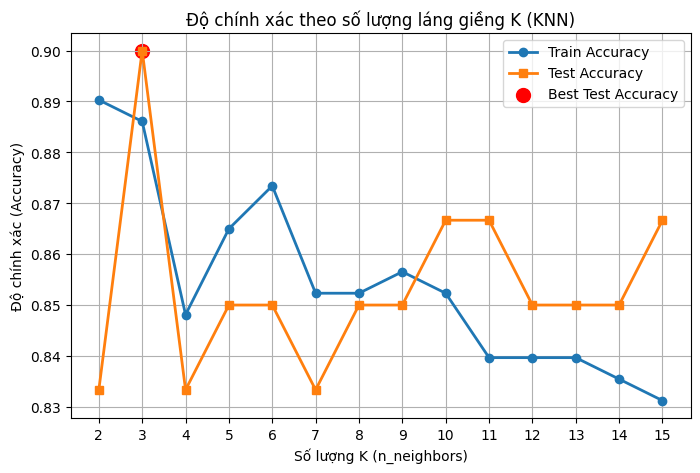

Giá trị K tốt nhất: 3
Độ chính xác Test lớn nhất: 0.9000
Độ chính xác Train tương ứng: 0.8861


In [1776]:
# --- Danh sách giá trị K muốn thử ---
k_values = range(2, 16)
train_accuracies = []
test_accuracies = []

# --- Lặp qua từng giá trị K ---
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Dự đoán trên train và test
    train_pred = knn.predict(X_train_scaled)
    test_pred = knn.predict(X_test_scaled)
    
    # Tính accuracy
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# --- Tìm K tốt nhất ---
best_index = test_accuracies.index(max(test_accuracies))
best_k = k_values[best_index]
best_test_acc = test_accuracies[best_index]
best_train_acc = train_accuracies[best_index]

# --- Vẽ biểu đồ ---
plt.figure(figsize=(8,5))
plt.plot(k_values, train_accuracies, marker='o', label='Train Accuracy', linewidth=2)
plt.plot(k_values, test_accuracies, marker='s', label='Test Accuracy', linewidth=2)

# Đánh dấu điểm tốt nhất
plt.scatter(best_k, best_test_acc, color='red', s=100, label='Best Test Accuracy')

plt.title('Độ chính xác theo số lượng láng giềng K (KNN)')
plt.xlabel('Số lượng K (n_neighbors)')
plt.ylabel('Độ chính xác (Accuracy)')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

# --- In ra kết quả ---
print(f'Giá trị K tốt nhất: {best_k}')
print(f'Độ chính xác Test lớn nhất: {best_test_acc:.4f}')
print(f'Độ chính xác Train tương ứng: {best_train_acc:.4f}')

#### - Đánh giá mô hình KNN cuối cùng (K=3):

In [1777]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
knn_preds = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, knn_preds))
conf_matrix = confusion_matrix(y_test, knn_preds)
print("Ma trận nhầm lẫn:\n", conf_matrix)
print("Báo cáo phân loại:\n",classification_report(y_test, knn_preds))

KNN Accuracy: 0.9
Ma trận nhầm lẫn:
 [[31  1]
 [ 5 23]]
Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91        32
           1       0.96      0.82      0.88        28

    accuracy                           0.90        60
   macro avg       0.91      0.90      0.90        60
weighted avg       0.91      0.90      0.90        60



### 3.3. Mô hình Decision Tree (DT)

#### - Tìm kiếm độ sâu tối ưu (max_depth):

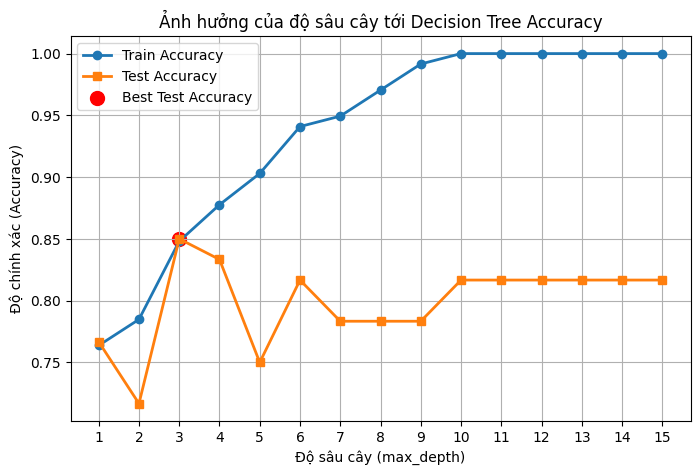

Độ sâu tốt nhất: 3
Độ chính xác Test lớn nhất: 0.8500
Độ chính xác Train tương ứng: 0.8481


In [1778]:
train_accuracies = []
test_accuracies = []

# Thử các độ sâu từ 1 đến 15
depth_values = range(1, 16)

for depth in depth_values:
    dt_model = DecisionTreeClassifier(
        criterion='entropy', 
        max_depth=depth,
        random_state=42
    )
    dt_model.fit(X_train_scaled, y_train)
    
    # Dự đoán trên train và test
    train_pred = dt_model.predict(X_train_scaled)
    test_pred = dt_model.predict(X_test_scaled)
    
    # Tính accuracy
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# --- Vẽ biểu đồ ---
plt.figure(figsize=(8,5))
plt.plot(depth_values, train_accuracies, marker='o', label='Train Accuracy', linewidth=2)
plt.plot(depth_values, test_accuracies, marker='s', label='Test Accuracy', linewidth=2)

plt.title('Ảnh hưởng của độ sâu cây tới Decision Tree Accuracy')
plt.xlabel('Độ sâu cây (max_depth)')
plt.ylabel('Độ chính xác (Accuracy)')
plt.xticks(depth_values)
plt.grid(True)
plt.legend()

# --- Tìm độ sâu có test accuracy cao nhất ---
best_index = test_accuracies.index(max(test_accuracies))
best_depth = depth_values[best_index]
best_test_acc = test_accuracies[best_index]
best_train_acc = train_accuracies[best_index]

# Đánh dấu điểm tốt nhất trên biểu đồ
plt.scatter(best_depth, best_test_acc, color='red', s=100, label='Best Test Accuracy')
plt.legend()
plt.show()

# --- In ra kết quả ---
print(f'Độ sâu tốt nhất: {best_depth}')
print(f'Độ chính xác Test lớn nhất: {best_test_acc:.4f}')
print(f'Độ chính xác Train tương ứng: {best_train_acc:.4f}')

#### - Đánh giá mô hình DT cuối cùng (max_depth=3):

In [1779]:
dt_model = DecisionTreeClassifier(
    criterion='entropy',   # hoặc 'entropy'
    max_depth=3,     # có thể giới hạn độ sâu để tránh overfitting
    random_state=42
)

dt_model.fit(X_train_scaled, y_train)

# --- 5. Dự đoán ---
dt_preds = dt_model.predict(X_test_scaled)

# --- 6. Đánh giá ---
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
conf_matrix = confusion_matrix(y_test, dt_preds)
print("Ma trận nhầm lẫn:\n", conf_matrix)
print("Báo cáo phân loại:\n",classification_report(y_test, dt_preds))

Decision Tree Accuracy: 0.85
Ma trận nhầm lẫn:
 [[30  2]
 [ 7 21]]
Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87        32
           1       0.91      0.75      0.82        28

    accuracy                           0.85        60
   macro avg       0.86      0.84      0.85        60
weighted avg       0.86      0.85      0.85        60



## 3.4. Mô hình Logistic Regression (LR)

#### - Tìm kiếm siêu tham số (C và penalty):

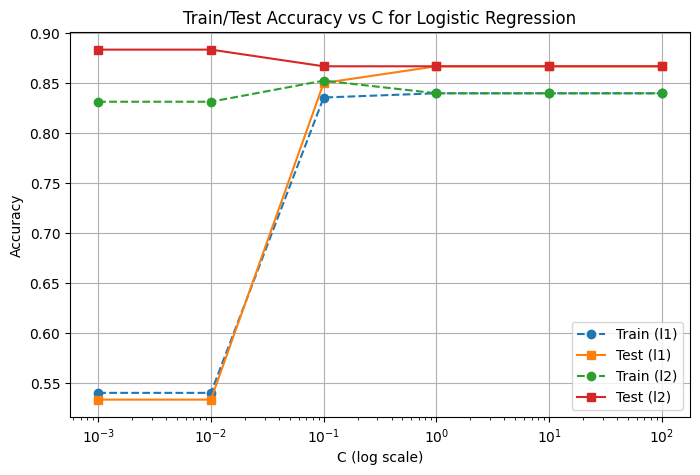

In [1780]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
penalties = ['l1', 'l2']

results = {p: {'train': [], 'test': []} for p in penalties}


# --- Huấn luyện và lưu kết quả ---
for penalty in penalties:
    for C in Cs:
        model = LogisticRegression(
            solver='liblinear',  # hỗ trợ cả L1 và L2
            penalty=penalty,
            C=C,
            random_state=42,
            max_iter=10000
        )
        model.fit(X_train_scaled, y_train)
        train_acc = accuracy_score(y_train, model.predict(X_train_scaled))
        test_acc = accuracy_score(y_test, model.predict(X_test_scaled))
        
        results[penalty]['train'].append(train_acc)
        results[penalty]['test'].append(test_acc)

# --- Vẽ biểu đồ ---
plt.figure(figsize=(8,5))

for penalty in penalties:
    plt.plot(Cs, results[penalty]['train'], marker='o', linestyle='--', label=f'Train ({penalty})')
    plt.plot(Cs, results[penalty]['test'], marker='s', label=f'Test ({penalty})')

plt.xscale('log')  # vì C thay đổi theo log scale
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Train/Test Accuracy vs C for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

#### - Đánh giá mô hình LR cuối cùng (C=0.1, penalty='l2'):

In [1781]:
log_model = LogisticRegression(
    solver='liblinear',  # hỗ trợ cả L1 và L2
    penalty='l2',
    C=0.01,
    random_state=42,
    max_iter=10000
)

# --- 4. Huấn luyện mô hình ---
log_model.fit(X_train_scaled, y_train)

# --- 5. Dự đoán ---
log_preds = log_model.predict(X_test_scaled)

# --- 6. Đánh giá ---
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))
conf_matrix = confusion_matrix(y_test, log_preds)
print("Ma trận nhầm lẫn:\n", conf_matrix)
print("Báo cáo phân loại:\n",classification_report(y_test, log_preds))

Logistic Regression Accuracy: 0.8833333333333333
Ma trận nhầm lẫn:
 [[30  2]
 [ 5 23]]
Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        32
           1       0.92      0.82      0.87        28

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



### 3.5. Mô hình Stacking

#### - Tìm siêu tham số C

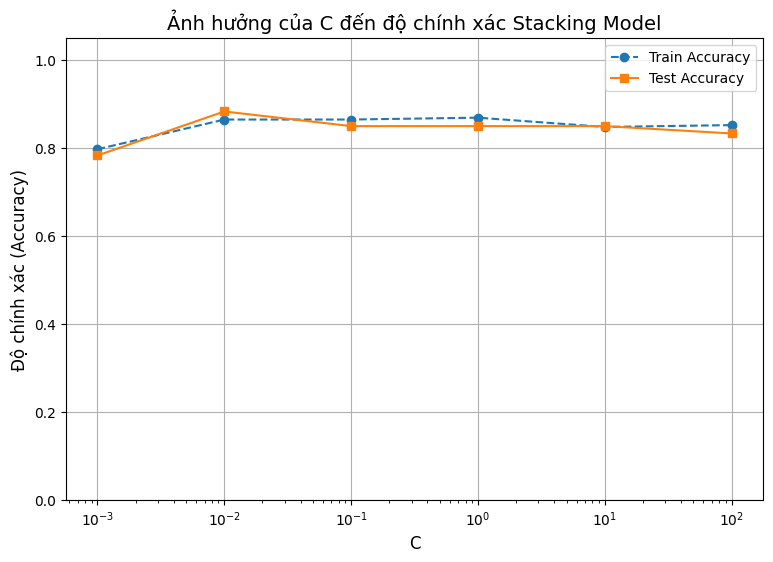

In [1782]:
# --- Danh sách K cần kiểm tra ---
c_values =[0.001, 0.01, 0.1, 1, 10, 100]
train_scores = []
test_scores = []
base_models = [
    ('knn', knn),
    ('dt', dt_model),
    ('log', log_model)
]
for k in c_values:  
    meta_model = LogisticRegression(C=k, solver='liblinear', max_iter=1000)
    # Tạo stacking model
    stacking_model = StackingClassifier(
        estimators=base_models,
        final_estimator=meta_model,
        passthrough=False,
        cv=5
    )

    # Huấn luyện
    stacking_model.fit(X_train_scaled, y_train)

    # Độ chính xác trên train
    train_preds = stacking_model.predict(X_train_scaled)
    train_acc = accuracy_score(y_train, train_preds)
    train_scores.append(train_acc)

    # Độ chính xác trên test
    test_preds = stacking_model.predict(X_test_scaled)
    test_acc = accuracy_score(y_test, test_preds)
    test_scores.append(test_acc)

# --- Vẽ biểu đồ ---
plt.figure(figsize=(9, 6))
plt.plot(c_values, train_scores, marker='o', label='Train Accuracy', linestyle='--')
plt.plot(c_values, test_scores, marker='s', label='Test Accuracy', linestyle='-')
plt.xscale('log')
plt.xlabel('C', fontsize=12)
plt.ylabel('Độ chính xác (Accuracy)', fontsize=12)
plt.title('Ảnh hưởng của C đến độ chính xác Stacking Model', fontsize=14)
plt.xticks(c_values)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)
plt.show()

In [1783]:
# --- Base models ---
base_models = [
    ('knn', knn),
    ('dt', dt_model),
    ('log', log_model)
]

# --- Meta-model ---
meta_model = LogisticRegression(C=0.01, solver='liblinear', max_iter=1000)
# meta_model = LogisticRegression(C=1, solver='liblinear', max_iter=1000)


# --- Tạo stacking model ---
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=False,
    cv=5
)

# --- Huấn luyện ---
stacking_model.fit(X_train_scaled, y_train)

# --- Dự đoán ---
stacking_preds = stacking_model.predict(X_test_scaled)

# --- Đánh giá ---
print("Stacking Accuracy:", accuracy_score(y_test, stacking_preds))
print("Ma trận nhầm lẫn:\n", confusion_matrix(y_test, stacking_preds))
print("Báo cáo phân loại:\n", classification_report(y_test, stacking_preds))


Stacking Accuracy: 0.8833333333333333
Ma trận nhầm lẫn:
 [[27  5]
 [ 2 26]]
Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.93      0.84      0.89        32
           1       0.84      0.93      0.88        28

    accuracy                           0.88        60
   macro avg       0.88      0.89      0.88        60
weighted avg       0.89      0.88      0.88        60



### 3.6. Đánh giá mô hình

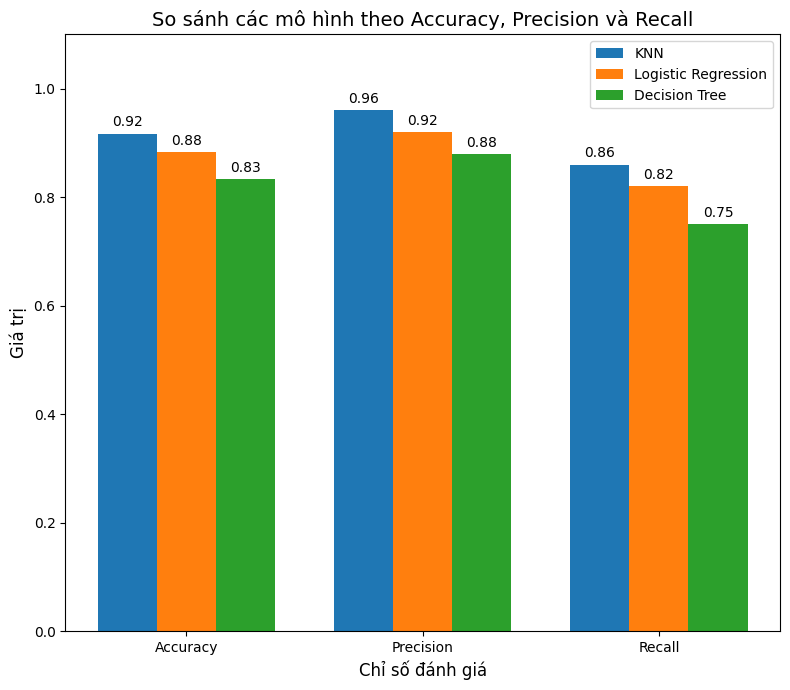

In [1784]:
# Dữ liệu của các chỉ số
metrics = ['Accuracy', 'Precision', 'Recall']

# Sắp xếp theo mức độ tốt giảm dần: KNN > Logistic Regression > Decision Tree
knn = [0.917, 0.96, 0.86]
logistic = [0.883, 0.92, 0.82]
decision_tree = [0.833, 0.88, 0.75]

# Thiết lập vị trí cột
x = np.arange(len(metrics))
width = 0.25  # độ rộng mỗi cột

# Vẽ biểu đồ (thứ tự giảm dần)
fig, ax = plt.subplots(figsize=(8, 7))
rects1 = ax.bar(x - width, knn, width, label='KNN', color='#1f77b4')  # Xanh
rects2 = ax.bar(x, logistic, width, label='Logistic Regression', color='#ff7f0e')  # Cam
rects3 = ax.bar(x + width, decision_tree, width, label='Decision Tree', color='#2ca02c')  # Xanh lá

ax.set_xlabel('Chỉ số đánh giá', fontsize=12)
ax.set_ylabel('Giá trị', fontsize=12)
ax.set_title('So sánh các mô hình theo Accuracy, Precision và Recall', fontsize=14) 
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1) 
ax.legend() # Hiển thị giá trị trên đầu mỗi cột
for rects in [rects1, rects2, rects3]: 
    for rect in rects: 
        height = rect.get_height() 
        ax.annotate(f'{height:.2f}', 
                    xy=(rect.get_x() + rect.get_width() / 2, height), 
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10) 
plt.tight_layout() 
plt.show()